In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/cleaned_f1_data_New.csv')

In [3]:
df.head()

,Season,Round,Race Name,Date,Circuit,Country,Latitude,Longitude,Driver,Driver Nationality,...,Constructor,Constructor Nationality,Grid Position,Race Position,Points Earned,Fastest Lap (s),Fastest Lap Rank,Total Pit Stops,Race Laps Completed,Retirement Status
0,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Bob Gerard,British,...,ERA,British,13,6,0.0,93.053598,-1,-1,67,Finished
1,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Cuth Harrison,British,...,ERA,British,15,7,0.0,93.053598,-1,-1,67,Finished
2,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,David Hampshire,British,...,Maserati,Italian,16,9,0.0,93.053598,-1,-1,64,Finished
3,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Brian Shawe Taylor,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished
4,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Joe Fry,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished


In [4]:
to_drop = ['Driver Championship Points','Latitude', 'Longitude','Driver Experience (Years)', 'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank', 'Total Pit Stops','Date','Country','Driver Nationality','Round','Season','Driver']
df = df.drop(columns=to_drop, errors='ignore')
df.columns

Index(['Race Name', 'Circuit', 'Driver Age', 'Constructor',
       'Constructor Nationality', 'Grid Position', 'Race Position',
       'Race Laps Completed', 'Retirement Status'],
      dtype='object')

In [5]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Race Name', 'Circuit', 'Constructor', 'Constructor Nationality',
       'Retirement Status'],
      dtype='object')


In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Driver Age', 'Grid Position', 'Race Position', 'Race Laps Completed'], dtype='object')


In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

categories_list = [df[col].unique().tolist() for col in categorical_cols]

encoder = OrdinalEncoder(categories=categories_list)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

print(df.head())

Categorical Columns: ['Race Name', 'Circuit', 'Constructor', 'Constructor Nationality', 'Retirement Status']
   Race Name  Circuit  Driver Age  Constructor  Constructor Nationality  \
0        0.0      0.0          36          0.0                      0.0   
1        0.0      0.0          44          0.0                      0.0   
2        0.0      0.0          33          1.0                      1.0   
3        0.0      0.0          35          1.0                      1.0   
4        0.0      0.0          35          1.0                      1.0   

   Grid Position  Race Position  Race Laps Completed  Retirement Status  
0             13              6                   67                0.0  
1             15              7                   67                0.0  
2             16              9                   64                0.0  
3             20             10                   64                0.0  
4             20             10                   64                0.

In [8]:
df['Driver Age Binary'] = (df['Driver Age'] > 30).astype(int)
df['Race Laps Binary'] = (df['Race Laps Completed'] > 50).astype(int)
df['Grid Position Binary'] = (df['Grid Position'] <= 10).astype(int)


In [9]:
df = df.drop(['Driver Age','Race Laps Completed','Grid Position'], axis=1)

In [10]:
print(df.head())

   Race Name  Circuit  Constructor  Constructor Nationality  Race Position  \
0        0.0      0.0          0.0                      0.0              6   
1        0.0      0.0          0.0                      0.0              7   
2        0.0      0.0          1.0                      1.0              9   
3        0.0      0.0          1.0                      1.0             10   
4        0.0      0.0          1.0                      1.0             10   

   Retirement Status  Driver Age Binary  Race Laps Binary  \
0                0.0                  1                 1   
1                0.0                  1                 1   
2                0.0                  1                 1   
3                0.0                  1                 1   
4                0.0                  1                 1   

   Grid Position Binary  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


Fine Tuning

In [11]:
df['Race Position'].unique()

array([ 6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21,  8, 18, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,  4,  3,  5, 34, 35, 36,
       37])

In [12]:
def categorize_positions(df):
    # Create a new column for position category based on two groups
    df['Position_Category'] = ''

    # Apply conditions
    df.loc[df['Race Position'] < 10, 'Position_Category'] = 'Front Row'
    df.loc[df['Race Position'] >= 10, 'Position_Category'] = 'Back Row'

    return df


In [13]:
df = categorize_positions(df)

In [14]:
df['Position_Category'].value_counts()

,count
Position_Category,
Back Row,2935
Front Row,681


In [15]:
Position_Category=["Front Row", "Back Row"]
MyOrdEncoder=OrdinalEncoder(categories=[Position_Category])
df["Position_Category"]=MyOrdEncoder.fit_transform(df[["Position_Category"]])
print(df)

      Race Name  Circuit  Constructor  Constructor Nationality  Race Position  \
0           0.0      0.0          0.0                      0.0              6   
1           0.0      0.0          0.0                      0.0              7   
2           0.0      0.0          1.0                      1.0              9   
3           0.0      0.0          1.0                      1.0             10   
4           0.0      0.0          1.0                      1.0             10   
...         ...      ...          ...                      ...            ...   
3611       14.0     38.0          3.0                      3.0             20   
3612        1.0      1.0          5.0                      1.0             20   
3613       27.0     39.0        156.0                      1.0             19   
3614       27.0     39.0        154.0                      4.0             20   
3615       26.0     23.0          5.0                      1.0             20   

      Retirement Status  Dr

In [16]:
df.drop(['Race Position'], axis=1, inplace=True)

In [17]:
X = df.drop(['Position_Category'], axis=1)  # Drops the target column, keeps the rest as features
y = df['Position_Category']

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8867403314917127
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.70      0.71       140
         1.0       0.93      0.93      0.93       584

    accuracy                           0.89       724
   macro avg       0.82      0.82      0.82       724
weighted avg       0.89      0.89      0.89       724



In [19]:
print("Training Features (X_train):")
print(X_train)
print("Shape:", X_train.shape)

print("\nTraining Labels (y_train):")
print(y_train)
print("Shape:", y_train.shape)

# Print testing set
print("\nTesting Features (X_test):")
print(X_test)
print("Shape:", X_test.shape)

print("\nTesting Labels (y_test):")
print(y_test)
print("Shape:", y_test.shape)

Training Features (X_train):
      Race Name  Circuit  Constructor  Constructor Nationality  \
2592       11.0     22.0        125.0                      5.0   
3216        6.0      7.0          5.0                      1.0   
1228        4.0      4.0         42.0                      0.0   
1234        7.0      8.0         87.0                      0.0   
794         1.0      1.0         46.0                      0.0   
...         ...      ...          ...                      ...   
1130       10.0     17.0         73.0                      0.0   
1294        7.0      8.0         89.0                      0.0   
860         8.0     11.0         70.0                      0.0   
3507       10.0     28.0        114.0                      2.0   
3174       17.0     13.0        134.0                      0.0   

      Retirement Status  Driver Age Binary  Race Laps Binary  \
2592                1.0                  1                 1   
3216                1.0                  0        

In [20]:
# Save training features
X_train.to_csv('X_train_DT.csv', index=False)

# Save training labels
y_train.to_csv('y_train_DT.csv', index=False)

# Save testing features
X_test.to_csv('X_test_DT.csv', index=False)

# Save testing labels
y_test.to_csv('y_test_DT.csv', index=False)

Confusion Matrix:
 [[ 98  42]
 [ 40 544]]


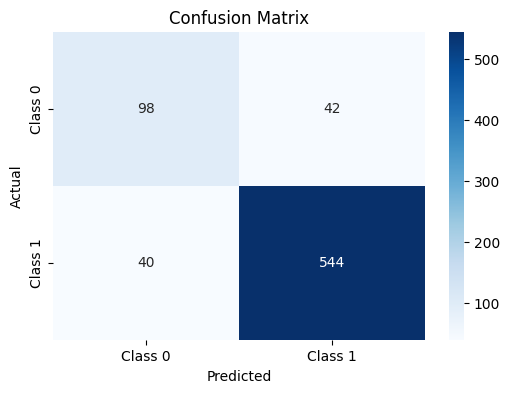

In [21]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




2nd Decision Tree

In [22]:
dt_model_2 = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=6)

# Train the model
dt_model_2.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model_2.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9185082872928176
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       140
         1.0       0.95      0.95      0.95       584

    accuracy                           0.92       724
   macro avg       0.87      0.87      0.87       724
weighted avg       0.92      0.92      0.92       724



Confusion Matrix:
 [[112  28]
 [ 31 553]]


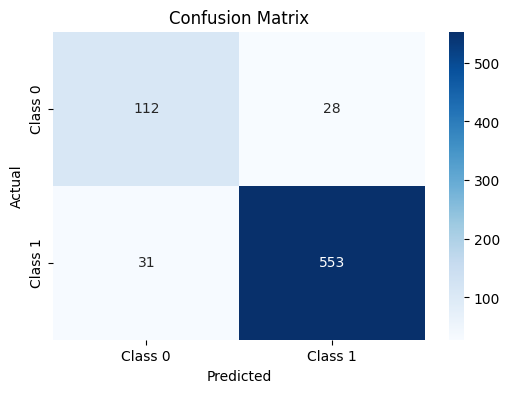

In [23]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

3rd decision Tree

In [24]:
dt_model_3 = DecisionTreeClassifier(random_state=42, criterion="gini", min_samples_split=20)

# Train the model
dt_model_3.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model_3.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9129834254143646
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       140
         1.0       0.95      0.94      0.95       584

    accuracy                           0.91       724
   macro avg       0.86      0.87      0.86       724
weighted avg       0.91      0.91      0.91       724



Confusion Matrix:
 [[111  29]
 [ 34 550]]


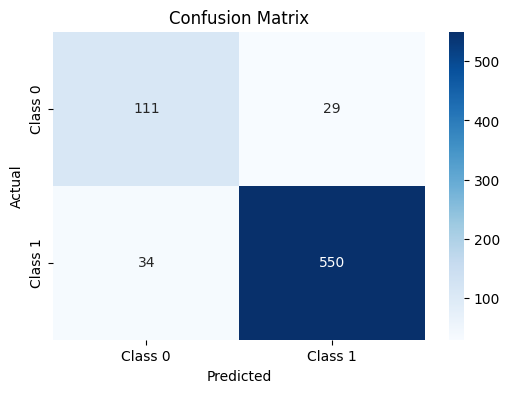

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Visualizing Trees

In [26]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Features: ['Race Name' 'Circuit' 'Constructor' 'Constructor Nationality'
 'Retirement Status' 'Driver Age Binary' 'Race Laps Binary'
 'Grid Position Binary']
Class Names: ['0.0' '1.0']


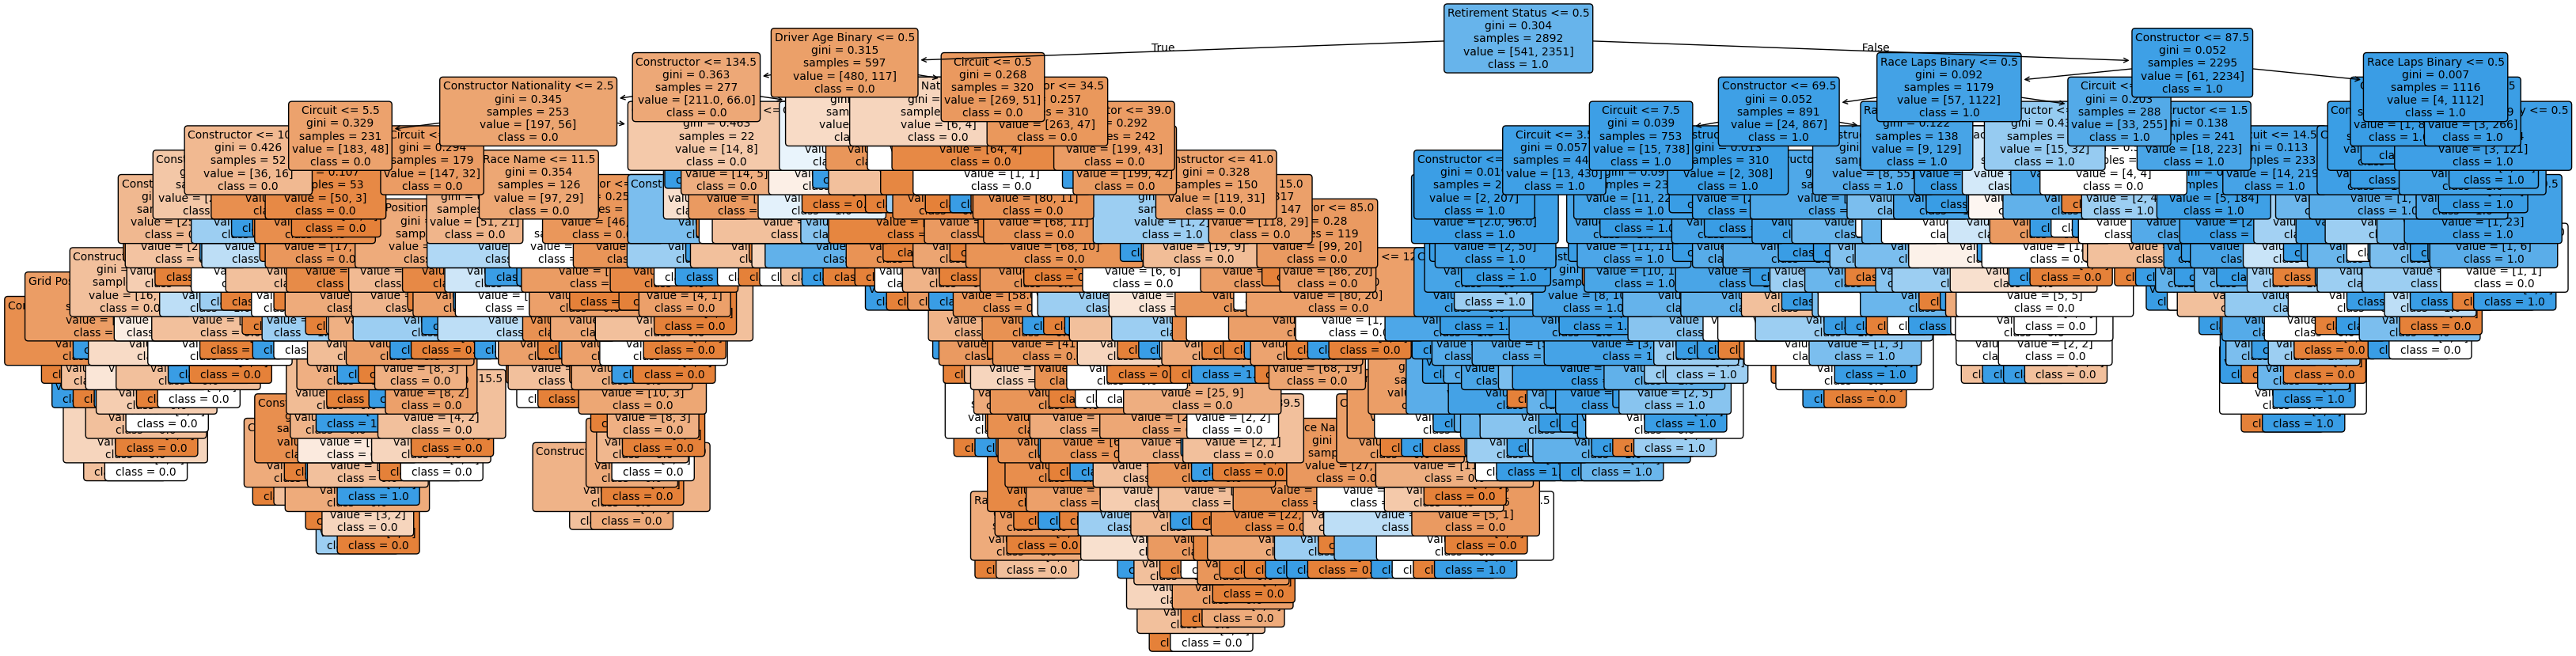

In [27]:
FeatureNames = X_train.columns.values
print("Features:", FeatureNames)

# Convert class names to strings to avoid TypeError
ClassNames = dt_model.classes_.astype(str)
print("Class Names:", ClassNames)

# Plotting the tree
plt.figure(figsize=(40, 10))
plot_tree(dt_model,
          feature_names=FeatureNames,
          class_names=ClassNames,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


In [28]:
dt_model_2 = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=6)
dt_model_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

Features: ['Race Name' 'Circuit' 'Constructor' 'Constructor Nationality'
 'Retirement Status' 'Driver Age Binary' 'Race Laps Binary'
 'Grid Position Binary']
Class Names: ['0.0' '1.0']


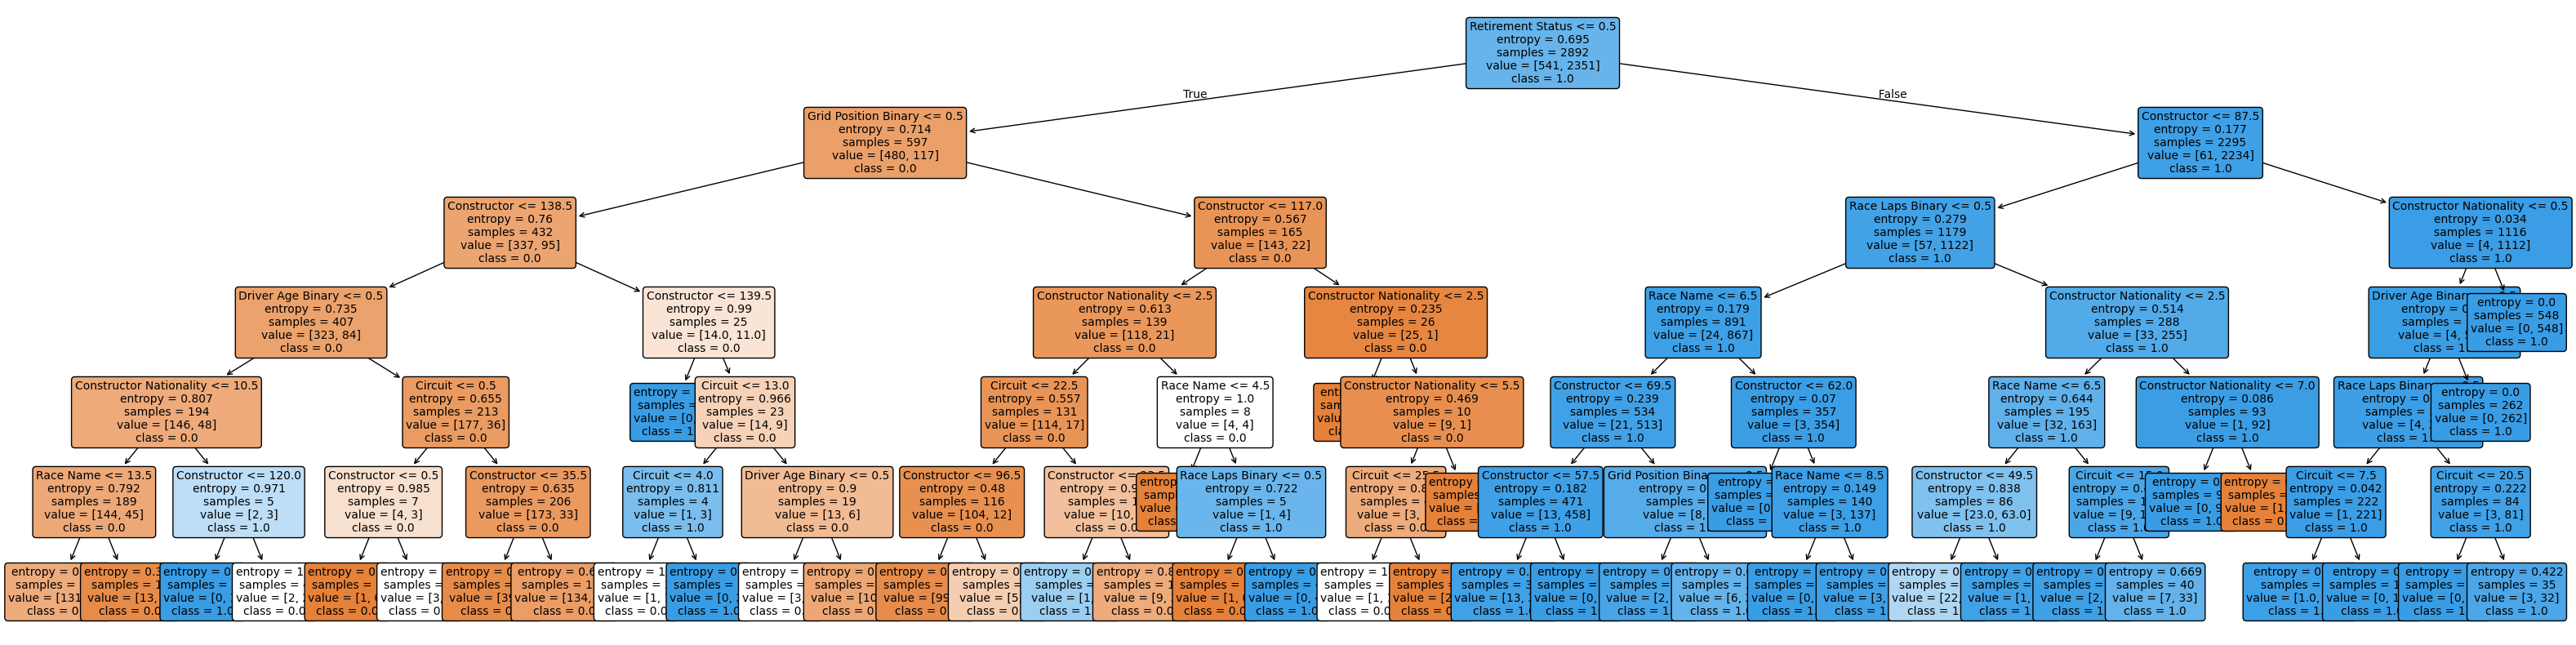

In [29]:
FeatureNames = X_train.columns.values
print("Features:", FeatureNames)

# Convert class names to strings to avoid TypeError
ClassNames = dt_model.classes_.astype(str)
print("Class Names:", ClassNames)

# Plotting the tree
plt.figure(figsize=(40, 10))
plot_tree(dt_model_2,
          feature_names=FeatureNames,
          class_names=ClassNames,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


In [30]:
dt_model_3 = DecisionTreeClassifier(random_state=42, criterion="gini", min_samples_split=20)
dt_model_3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

Features: ['Race Name' 'Circuit' 'Constructor' 'Constructor Nationality'
 'Retirement Status' 'Driver Age Binary' 'Race Laps Binary'
 'Grid Position Binary']
Class Names: ['0.0' '1.0']


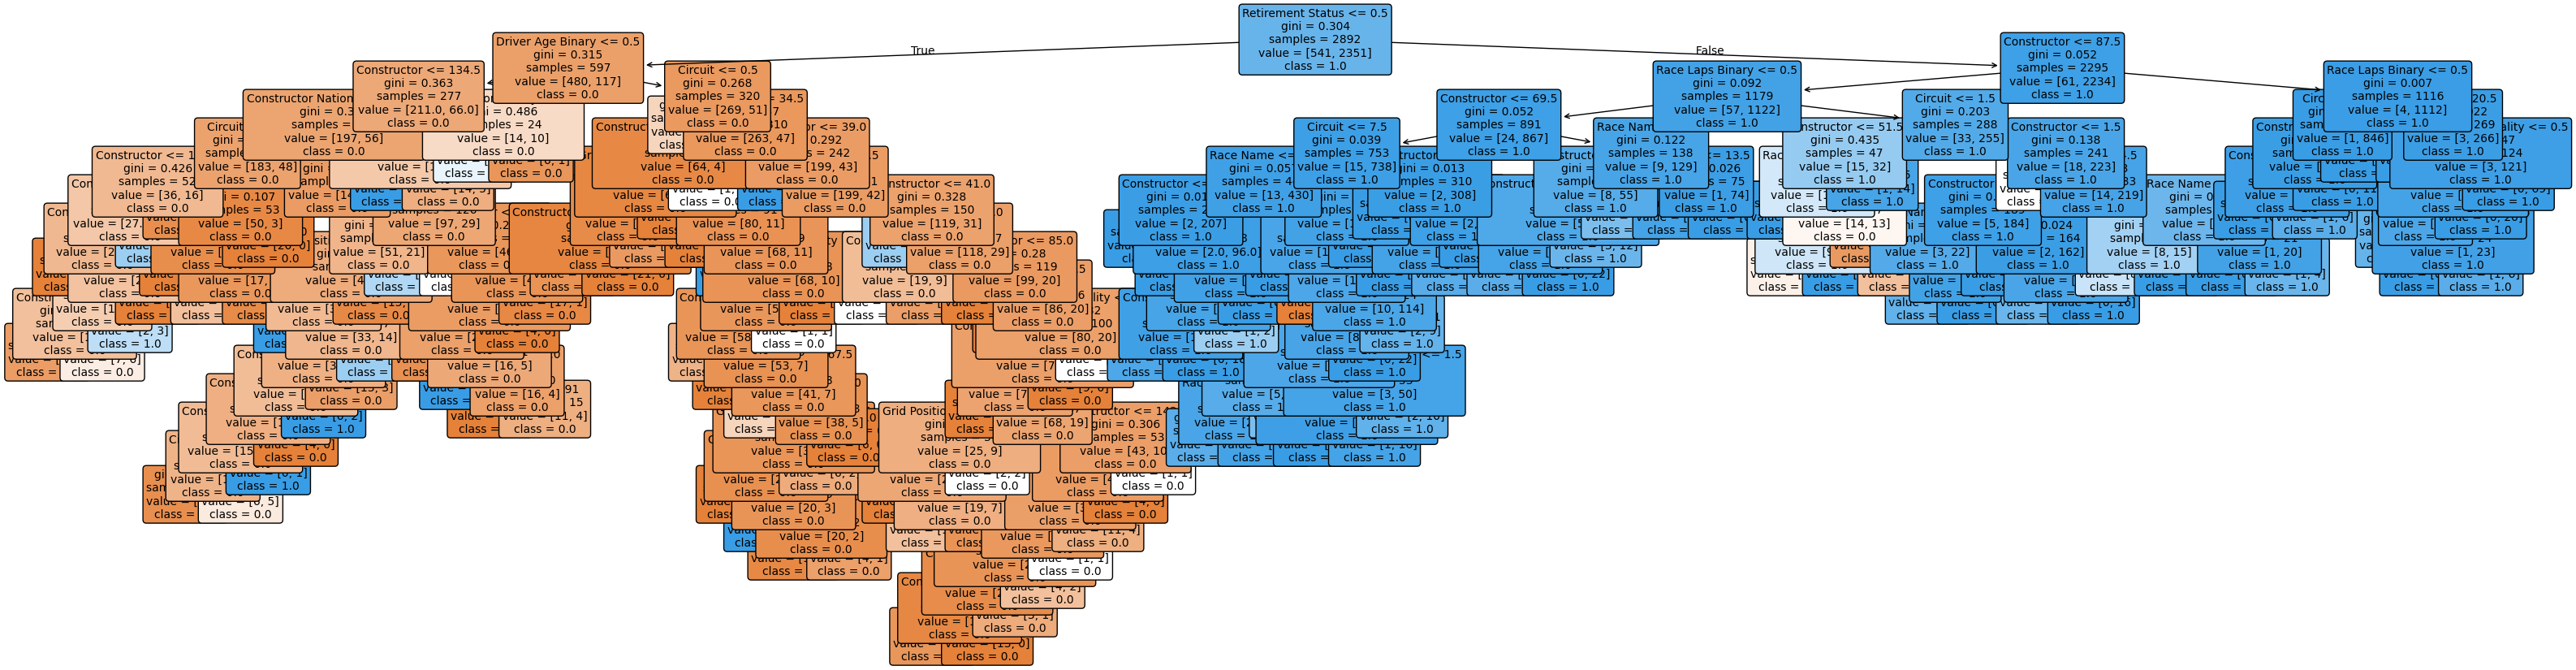

In [31]:
FeatureNames = X_train.columns.values
print("Features:", FeatureNames)

# Convert class names to strings to avoid TypeError
ClassNames = dt_model.classes_.astype(str)
print("Class Names:", ClassNames)

# Plotting the tree
plt.figure(figsize=(40, 10))
plot_tree(dt_model_3,
          feature_names=FeatureNames,
          class_names=ClassNames,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()